In [1]:
import numpy as np
import style
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

In [28]:
class LinearRegression:
    def __init__(self, lr=0.01):
        self.lr=lr
    def fit(self,x,y):
        self.x=x
        self.y=y
        self.w=np.random.random()
        self.b=np.random.random()
        minimum=0.1
        while self.cost(self.w,self.b)>minimum:
            self.gradient_descent()
        print(self.w,self.b)
    def gradient_descent(self):
            self.w-=self.lr*self.diff_w()
            self.b-=self.lr*self.diff_b()
    def cost(self,w,b):
        y_pred=self.w*self.x+self.b
        y2=y_pred-self.y
        cost=np.mean(y2**2)
        return cost
    def diff_w(self):
        diff_w=np.sum((self.w*self.x+self.b-self.y)*self.x)/len(self.x)
        return diff_w
    def diff_b(self):
        diff_b=2*self.cost(self.w,self.b)
        return diff_b
    def predict(self,x):
        y_new=self.w*x+self.b
        return y_new
        
    
    


In [12]:
bias=100
x,y,coef=make_regression(n_samples=100, n_features=1,bias=100,noise=10, random_state=42, coef=True)
x_shaped = x.reshape(-1, 1)
y_shaped = y.reshape(-1, 1)
scaler = MinMaxScaler()
x_scaled=scaler.fit_transform(x_shaped)
y_scaled=scaler.fit_transform(y_shaped)

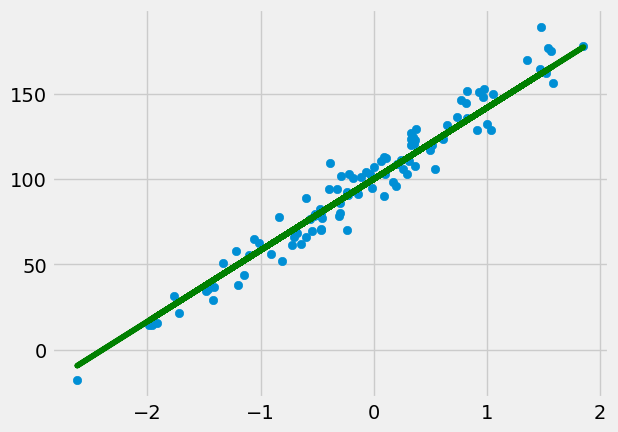

In [13]:
y_new=coef*x+bias
plt.scatter(x,y)
plt.plot(x,y_new,'g')
plt.show()

0.2886260849507155 0.31910534048141037


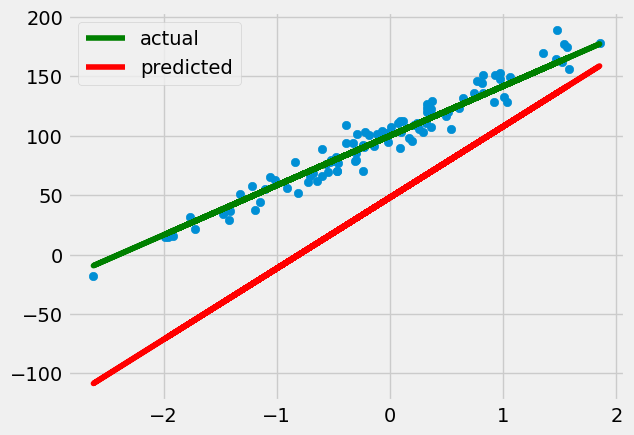

In [29]:
y_new=coef*x+bias
plt.scatter(x,y)
plt.plot(x,y_new,'g', label='actual')
model=LinearRegression()
model.fit(x_scaled,y_scaled)
y_new2=scaler.inverse_transform(model.predict(x))
# print(y_new2)
plt.plot(x,y_new2,'r', label='predicted')
plt.legend()
plt.show()